In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction

In this Exercise, we explore the non parametric estimation of a peculiar density function know as 'Bart Simpson' density which is given by
$$f(x) = \frac{1}{2} \phi(x; 0,1) +  \frac{1}{10} \sum_{j=0}^{4} \phi(x; (j/2) - 1, 1/10),$$
where $\phi(x; \mu, \sigma)$ is the normal density.

Example taken from the reference: Larry Wasserman, 2006. All of Nonparametric Statistics.

In [2]:
def Bart_Simpson_sample(size=100, mu_ = 0, sigma_ = 1, mu_0 = -1, mu_1=-1/2, mu_2=0, mu_3=1/2, mu_4=1, sigma_p2=1/10):
    """
    Generates Random Sample From 'Bart Simpson Distribution' given by:
    f(x) = (1/2) phi(x; 0,1) + (1/10) \sum_{j=0]^{4} phi(x; (j/2) - 1, 1/10)
    where phi(x,u,s) is the density of a normal distribution with mean u and standard deviation s.
    
    Currently checks only for integers in size arg. 
    """
    
    try:
        val = int(size)
    except ValueError:
        print("Size not an int!")
    
    sample = []
    selector = np.random.choice(range(0,6), 
                 size=size,
                 p=[0.5,0.1,0.1,0.1,0.1,0.1])
    
    for i in range(size):
        if selector[i] == 0:
            sample.append(norm.rvs(mu_,sigma_))
        if selector[i] == 1:
            sample.append(norm.rvs(mu_0,sigma_p2))
        if selector[i] == 2:
            sample.append(norm.rvs(mu_1,sigma_p2))
        if selector[i] == 3:
            sample.append(norm.rvs(mu_2,sigma_p2))
        if selector[i] == 4:
            sample.append(norm.rvs(mu_3,sigma_p2))
        if selector[i] == 5:
            sample.append(norm.rvs(mu_4,sigma_p2))
            
    return(np.array(sample))

Let us plot the density function:

Text(0, 0.5, '$f(x)$')

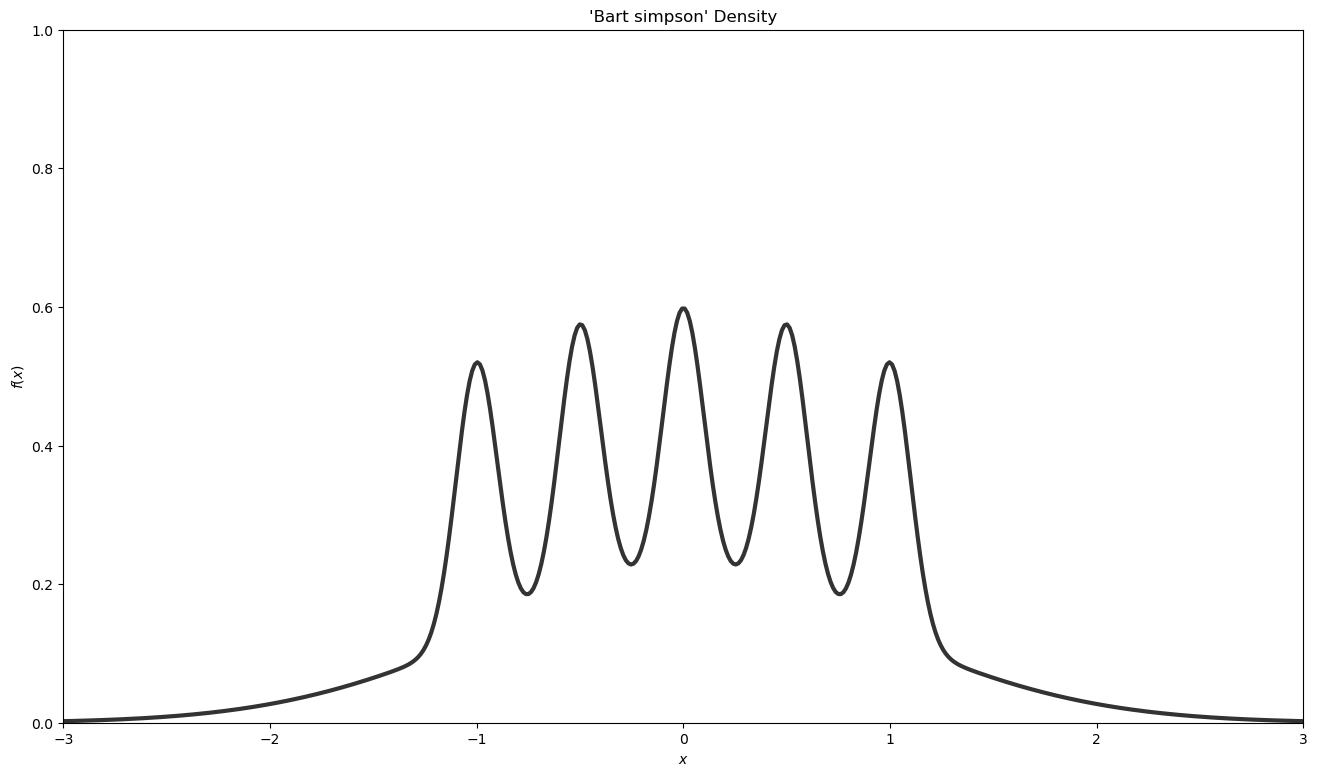

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 500)

ax.plot(x, 0.5*norm.pdf(x, loc=0, scale=1) +
        0.1*norm.pdf(x, loc=-1  , scale=0.1) +
        0.1*norm.pdf(x, loc=-1/2, scale=0.1) +
        0.1*norm.pdf(x, loc= 0  , scale=0.1) +
        0.1*norm.pdf(x, loc= 1/2, scale=0.1) +
        0.1*norm.pdf(x, loc= 1,   scale=0.1), 
        color='k', lw=3, alpha=0.8)

plt.ylim( 0,1)
plt.xlim(-3,3)
plt.title('\'Bart simpson\' Density')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

Now, we simulate 1,000 observations:

In [4]:
sample = Bart_Simpson_sample(1000)

To estimate the density, first we use the histogram.

Text(0, 0.5, '$f(x)$')

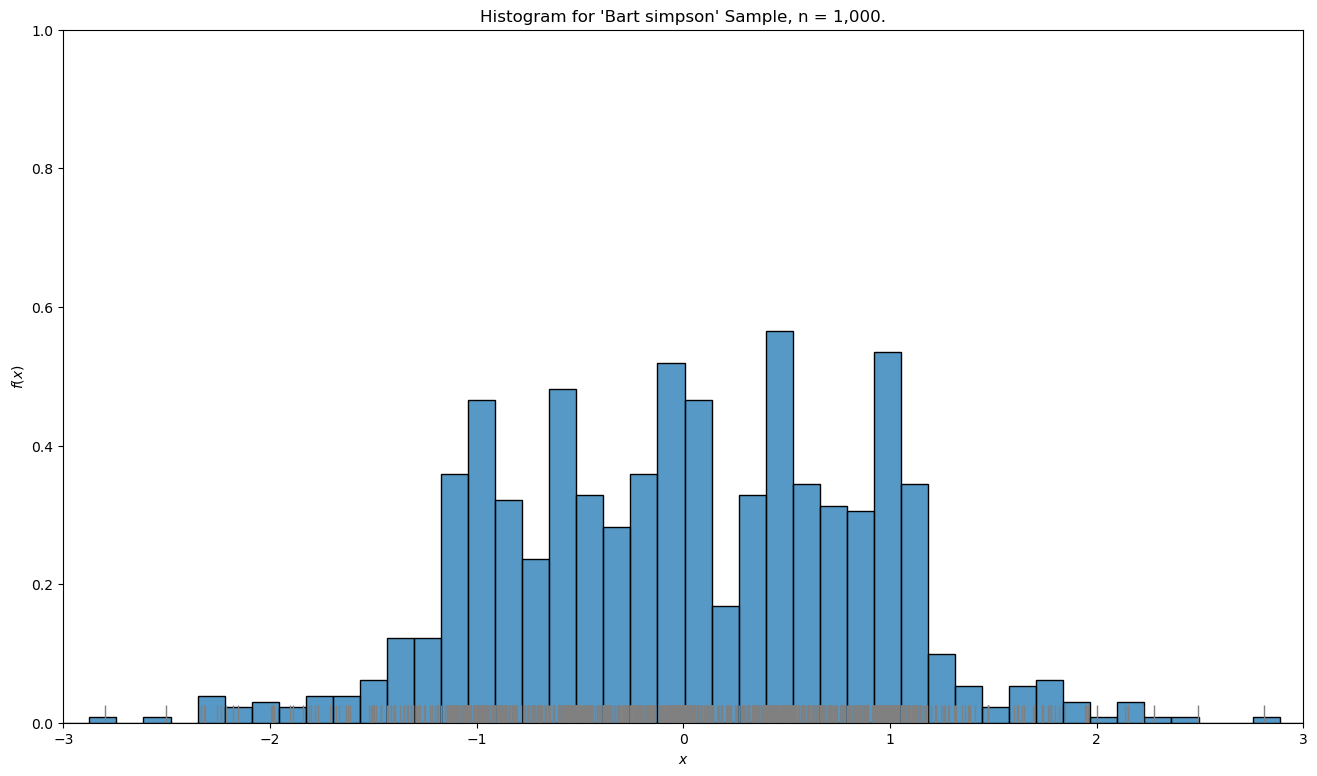

In [5]:
fig_h, ax_h = plt.subplots(1, 1, figsize=(16,9))

sns.histplot(sample, bins=50, stat='density')
sns.rugplot(sample, color='grey')

plt.ylim( 0,1)
plt.xlim(-3,3)
plt.title('Histogram for \'Bart simpson\' Sample, n = 1,000.')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

We can see that the histogram with 50 bins does not provides a good estimate of the density, even with 1,000 observations. This is due to the nature of the histogram to use rectangles.

Now, let us explore the kernel density estimator.


Text(0, 0.5, '$f(x)$')

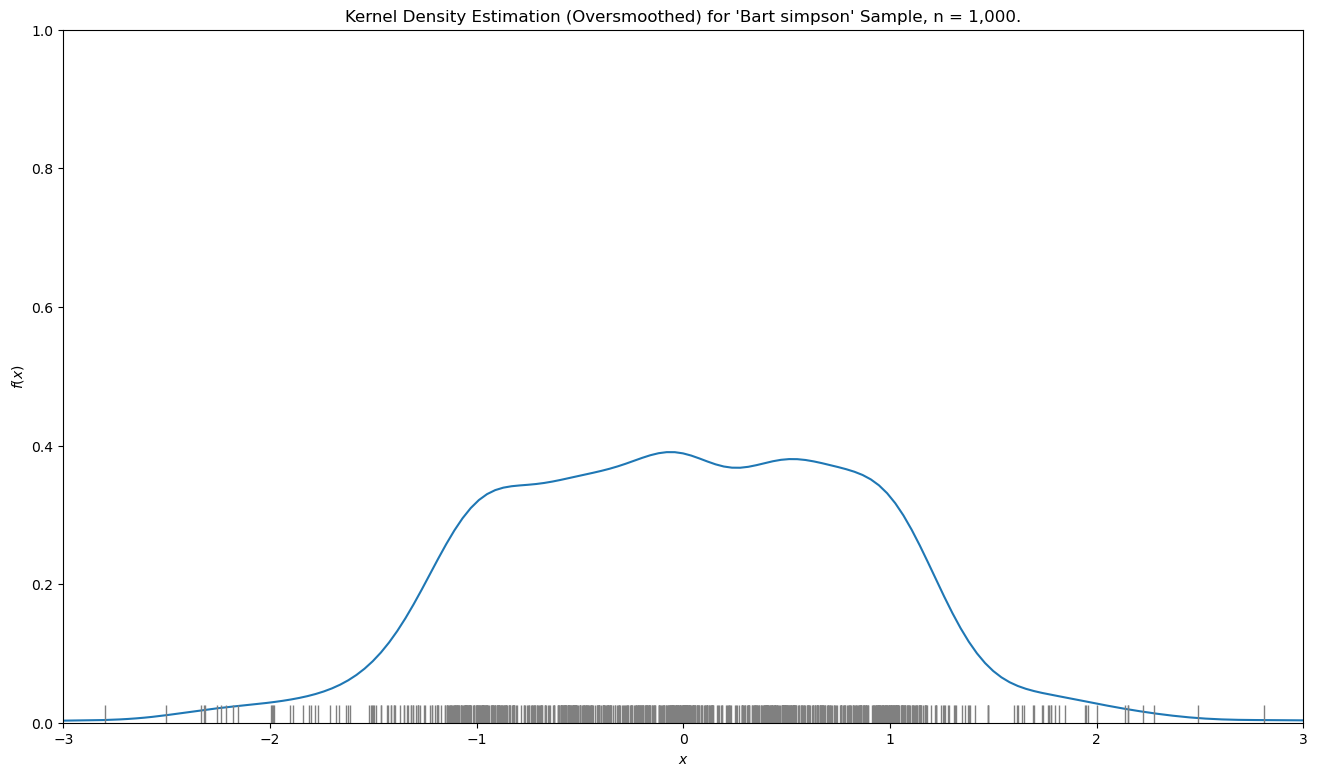

In [6]:
fig_kde1, ax_kde1 = plt.subplots(1, 1, figsize=(16,9))

sns.kdeplot(sample)
sns.rugplot(sample, color='grey')

plt.ylim( 0,1)
plt.xlim(-3,3)
plt.title('Kernel Density Estimation (Oversmoothed) for \'Bart simpson\' Sample, n = 1,000.')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

Text(0, 0.5, '$f(x)$')

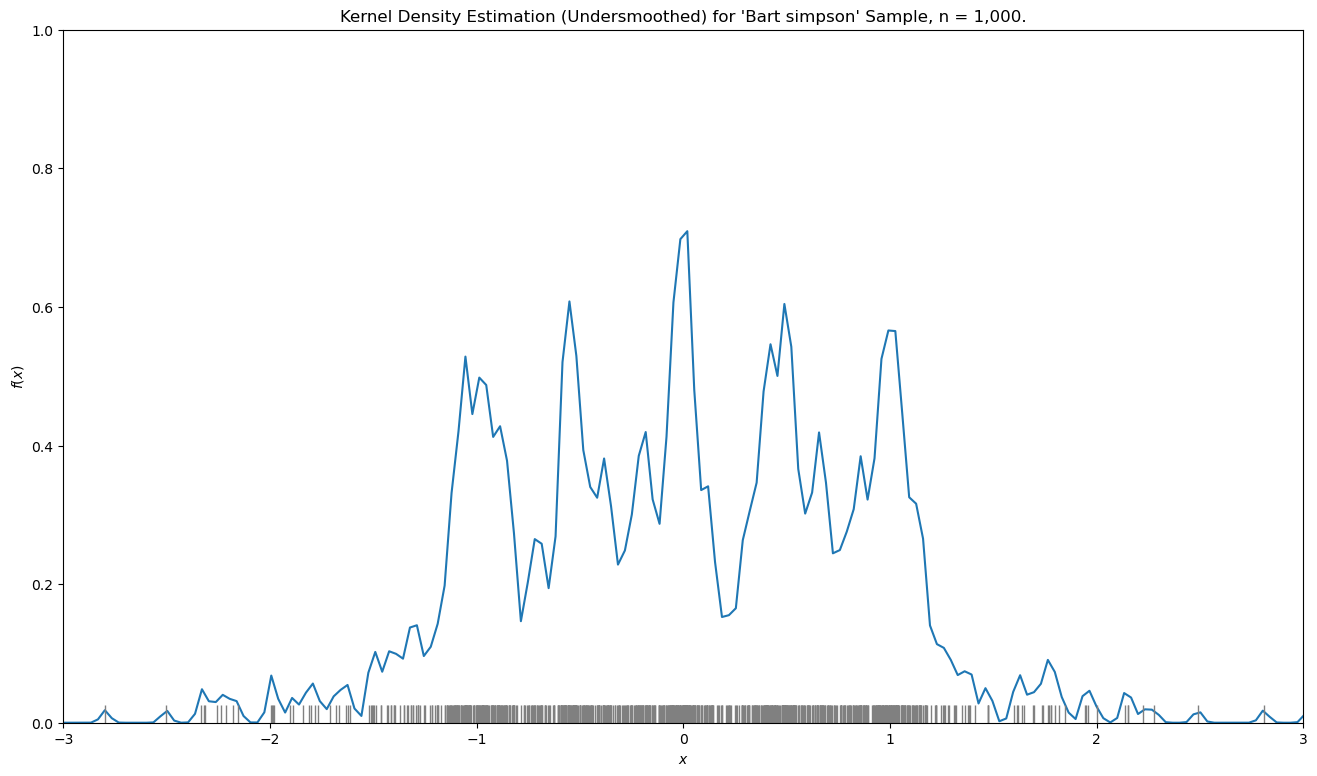

In [7]:
fig_kde2, ax_kde2 = plt.subplots(1, 1, figsize=(16,9))

sns.kdeplot(sample, bw_adjust=0.1)
sns.rugplot(sample, color='grey')

plt.ylim( 0,1)
plt.xlim(-3,3)
plt.title('Kernel Density Estimation (Undersmoothed) for \'Bart simpson\' Sample, n = 1,000.')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

Text(0, 0.5, '$f(x)$')

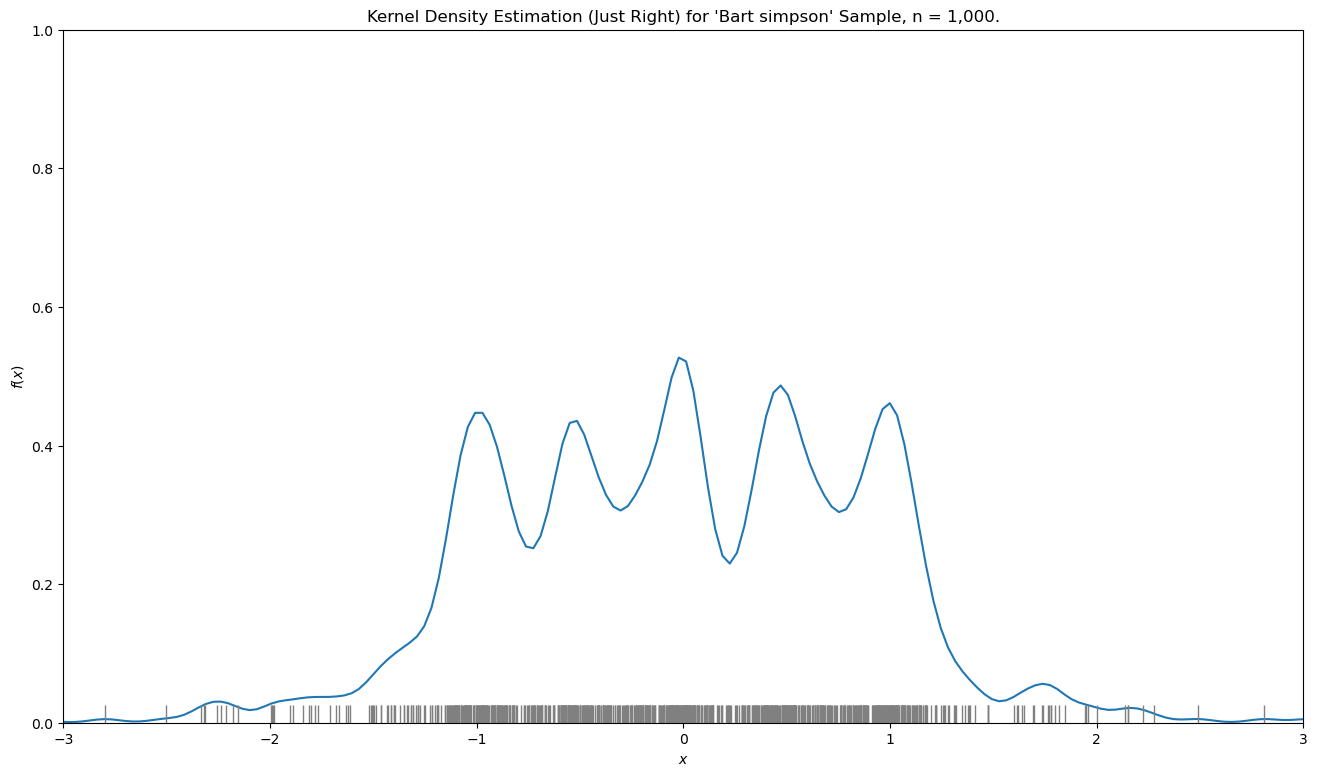

In [8]:
fig_kde3, ax_kde3 = plt.subplots(1, 1, figsize=(16,9))

sns.kdeplot(sample, bw_adjust=0.35)
sns.rugplot(sample, color='grey')


plt.ylim( 0,1)
plt.xlim(-3,3)
plt.title('Kernel Density Estimation (Just Right) for \'Bart simpson\' Sample, n = 1,000.')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

Text(0, 0.5, '$f(x)$')

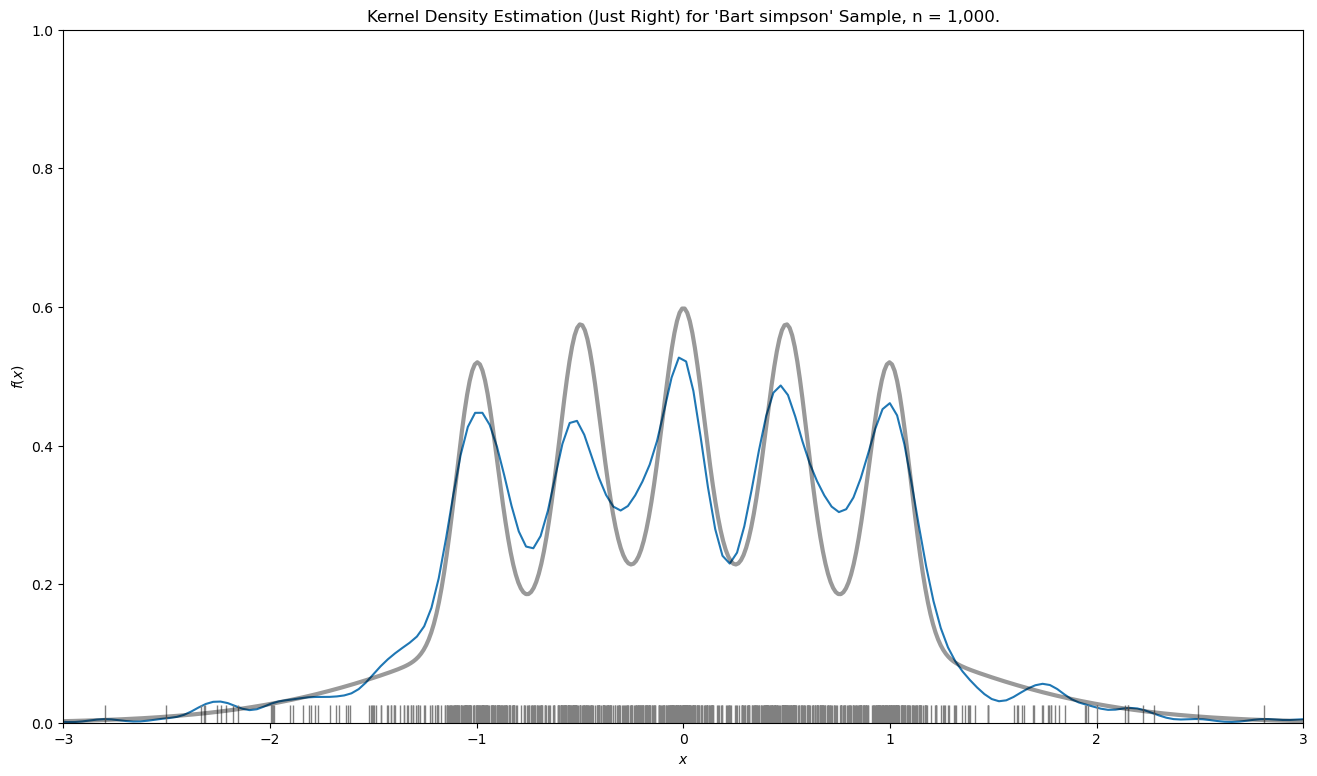

In [9]:
fig_kde3, ax_kde3 = plt.subplots(1, 1, figsize=(16,9))

sns.kdeplot(sample, bw_adjust=0.35)
sns.rugplot(sample, color='grey')

ax_kde3.plot(x, 0.5*norm.pdf(x, loc=0, scale=1) +
        0.1*norm.pdf(x, loc=-1  , scale=0.1) +
        0.1*norm.pdf(x, loc=-1/2, scale=0.1) +
        0.1*norm.pdf(x, loc= 0  , scale=0.1) +
        0.1*norm.pdf(x, loc= 1/2, scale=0.1) +
        0.1*norm.pdf(x, loc= 1,   scale=0.1), 
        color='k', lw=3, alpha=0.4)

plt.ylim( 0,1)
plt.xlim(-3,3)
plt.title('Kernel Density Estimation (Just Right) for \'Bart simpson\' Sample, n = 1,000.')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

We have explored three different adjustments for the bandwidth of the kerneln density estimator. We can see that this method gives us a better result than the histogram, but this is because we knew what we were looking for. In a real data set, we will not know the true density from which the data comes from. 